In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [205]:
df = pd.read_csv('netflix.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# 1. Defining Problem Statement and Analysing basic metrics 


- To analyze and generate insights for Netflix on which type of shows/movies to produce and how to grow the business in different countries

Show_id: Unique ID for each Movie and TV show

Type: Identifier - A Movie or TV Show

Title: Title of the Movie / Tv Show

Director: Director of the Movie (null values observed in column)

Cast: Actors involved in the movie/show (null values observed in column)

Country: Country where the movie/show was produced (null values observed in column)

Date_added: Date it was added on Netflix (null values observed in column)

Release_year: Actual Release year of the movie/show

Rating: TV Rating of the movie/show

Duration: Total Duration - in minutes or number of seasons

Listed_in: Genre

Description: The summary description


- Data Understanding: Understand the structure and contents of the dataset provided, including the columns, data types, and any missing values.

- Basic Metrics Analysis: Analyze basic metrics such as the distribution of movies vs. TV shows, countries with the most content, distribution of ratings, popular genres, etc.

# 2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary 

In [206]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [207]:
df.shape

(8807, 12)

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [209]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [210]:
# Missing value (number of null values column-wise)
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [211]:
# Conversion of missing value to percentile
for column in df:
    counter = round((df[column].isnull().sum()/len(df)) * 100,3)
    print(column,"->",counter)

show_id -> 0.0
type -> 0.0
title -> 0.0
director -> 29.908
cast -> 9.368
country -> 9.436
date_added -> 0.114
release_year -> 0.0
rating -> 0.045
duration -> 0.034
listed_in -> 0.0
description -> 0.0


Statistical summary

In [212]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [214]:
df.describe(include=object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [147]:
df1 = df

In [241]:
# conversion of categorical attributes to 'category'
# Specify custom date format
df1["date_added"] = pd.to_datetime(df1["date_added"], format="%B %d, %Y", errors="coerce")

# Convert other columns to categorical data type
df1 = df1.astype({"type": "category", "rating": "category"})

In [242]:
df1["date_added"]

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]

In [243]:
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,Saturday
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,Friday
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,Friday
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,Friday
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,Friday


# 3. Non-Graphical Analysis: Value counts and unique attributes

In [244]:
# director column value counts
df['director'].value_counts()

director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4528, dtype: int64

- There are some movies which are directed by multiple directors.
- Hence multiple names of directors are given in comma separated format.

In [245]:
dir_tb = df[['show_id' , 'type' , 'director']]
dir_tb.dropna(inplace = True)
dir_tb['director'] = dir_tb['director'].apply(lambda x : x.split(','))
dir_tb

,show_id,type,director
0,s1,Movie,[Kirsten Johnson]
2,s3,TV Show,[Julien Leclercq]
5,s6,TV Show,[Mike Flanagan]
6,s7,Movie,"[Robert Cullen, José Luis Ucha]"
7,s8,Movie,[Haile Gerima]
...,...,...,...
8801,s8802,Movie,[Majid Al Ansari]
8802,s8803,Movie,[David Fincher]
8804,s8805,Movie,[Ruben Fleischer]
8805,s8806,Movie,[Peter Hewitt]


In [246]:
dir_tb = dir_tb.explode('director')

In [247]:
dir_tb['director'] = dir_tb['director'].str.strip()

In [248]:
# checking if empty stirngs are there in director column
dir_tb.director.apply(lambda x : True if len(x) == 0 else False).value_counts()

director
False    6978
Name: count, dtype: int64

In [249]:
dir_tb

,show_id,type,director
0,s1,Movie,Kirsten Johnson
2,s3,TV Show,Julien Leclercq
5,s6,TV Show,Mike Flanagan
6,s7,Movie,Robert Cullen
6,s7,Movie,José Luis Ucha
...,...,...,...
8801,s8802,Movie,Majid Al Ansari
8802,s8803,Movie,David Fincher
8804,s8805,Movie,Ruben Fleischer
8805,s8806,Movie,Peter Hewitt


In [250]:
dir_tb['director'].nunique()

4993

- There are total 4993 unique directors in the dataset.

In [251]:
# Total movies and tv shows directed by each director
x = dir_tb.groupby(['director' , 'type'])['show_id'].count().reset_index()
x.pivot(index= ['director'] , columns = 'type' , values = 'show_id').sort_values('Movie' ,ascending = False)

type,Movie,TV Show
director,,
Rajiv Chilaka,22.0,NaN
Jan Suter,21.0,NaN
Raúl Campos,19.0,NaN
Suhas Kadav,16.0,NaN
Marcus Raboy,15.0,1.0
...,...,...
Vijay S. Bhanushali,NaN,1.0
Wouter Bouvijn,NaN,1.0
YC Tom Lee,NaN,1.0


In [252]:
# unique ratings
df['rating'].unique().tolist()

['PG-13',
 'TV-MA',
 'PG',
 'TV-14',
 'TV-PG',
 'TV-Y',
 'TV-Y7',
 'R',
 'TV-G',
 'G',
 'NC-17',
 '74 min',
 '84 min',
 '66 min',
 'NR',
 nan,
 'TV-Y7-FV',
 'UR']

In [253]:
# country column value counts
df.country.value_counts()

country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

- The analysis reveals that the United States has the highest number of movies or TV shows available on Netflix, with a count of 2818
- Following the United States, India stands out as the country with the second-highest count of movies or TV shows on Netflix, with a count of 972. 
- While the United States and India lead in content count, other countries such as the United Kingdom, Japan, and South Korea also make significant contributions to Netflix's catalog.

In [254]:
# Movie and TV show counts
df.type.value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

 - It shows that around 70% content is Movies and around 30% content is TV shows.

In [255]:
# Rating and counts
df.rating.value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

- Last three values in the count belongs to duration columns

In [256]:
# Moving duration in ratings to duration column
df.loc[(df["rating"] == "74 min") | (df["rating"] == "84 min") | (df["rating"] == "66 min")]
df["duration"][[5541,5794,5813]] = df["rating"][[5541,5794,5813]]
df["rating"][[5541,5794,5813]] = "Nan"

In [257]:
df["rating"].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
Nan            3
UR             3
Name: count, dtype: int64

# 4. Visual Analysis - Univariate, Bivariate after pre-processing of the data

<b> Univariate Analysis </b>

In [164]:
dt = df1
dt['year_added'] = df1.date_added.dt.year
dt['month_added'] = df1.date_added.dt.month
dt['day_added'] = df1.date_added.dt.day_name()

In [45]:
dt

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,Saturday
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,Friday
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,Friday
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,Friday
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,11.0,Wednesday
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0,7.0,Monday
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,11.0,Friday
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,1.0,Saturday


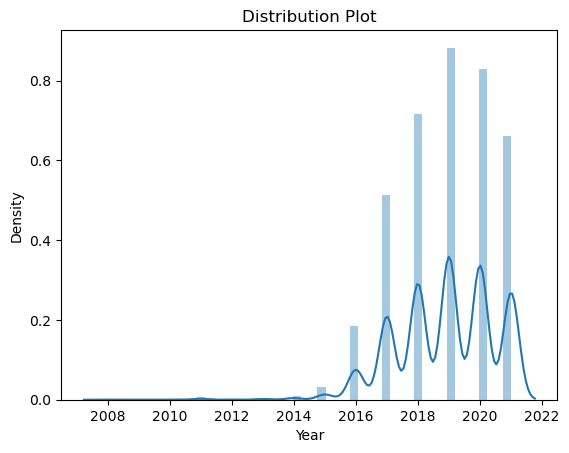

In [165]:
# Distplot

sns.distplot(dt['year_added'], kde=True, hist=True)  # Plotting the distribution with KDE and histogram
plt.xlabel('Year')  # Optional: Label for the x-axis
plt.ylabel('Density')  # Optional: Label for the y-axis
plt.title('Distribution Plot')  # Optional: Title for the plot
plt.show()

- 2019 marks the highest number of movies and TV shows added on the Netflix.

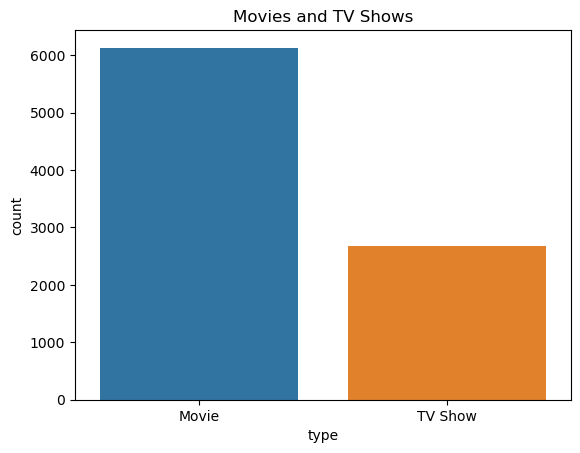

In [47]:
# Countplot

sns.countplot(x='type',data=dt)
plt.title('Movies and TV Shows')
plt.show()

- The count plot clearly highlights a substantial disparity between the number of movies and TV shows available in the dataset, with a significantly higher count of movies compared to TV shows

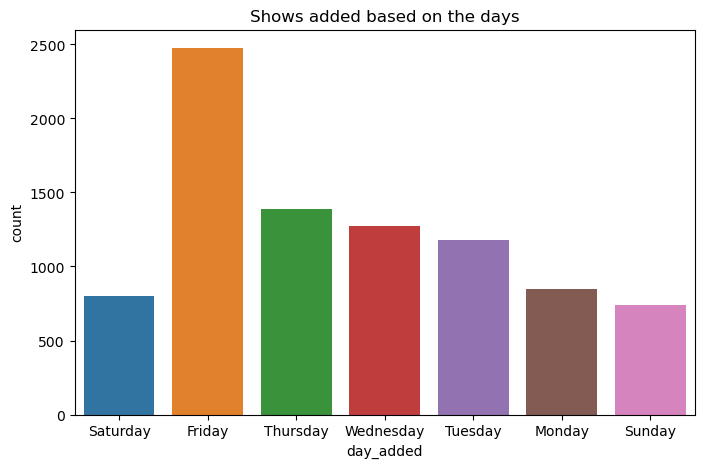

In [48]:
plt.figure(figsize= (8,5))
sns.countplot(x='day_added',data=dt)
plt.title('Shows added based on the days')
plt.show()

- The majority of content uploads occur on Fridays, with nearly 2500 uploads representing the peak count.

<b> Bivariate Analysis </b>

In [299]:
dt = df1
dt['year_added'] = df1.date_added.dt.year
dt['month_added'] = df1.date_added.dt.month_name()
dt['day_added'] = df1.date_added.dt.day_name()
dt

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,September,Saturday
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,September,Friday
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,September,Friday
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,September,Friday
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,September,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,November,Wednesday
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0,July,Monday
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,November,Friday
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,January,Saturday


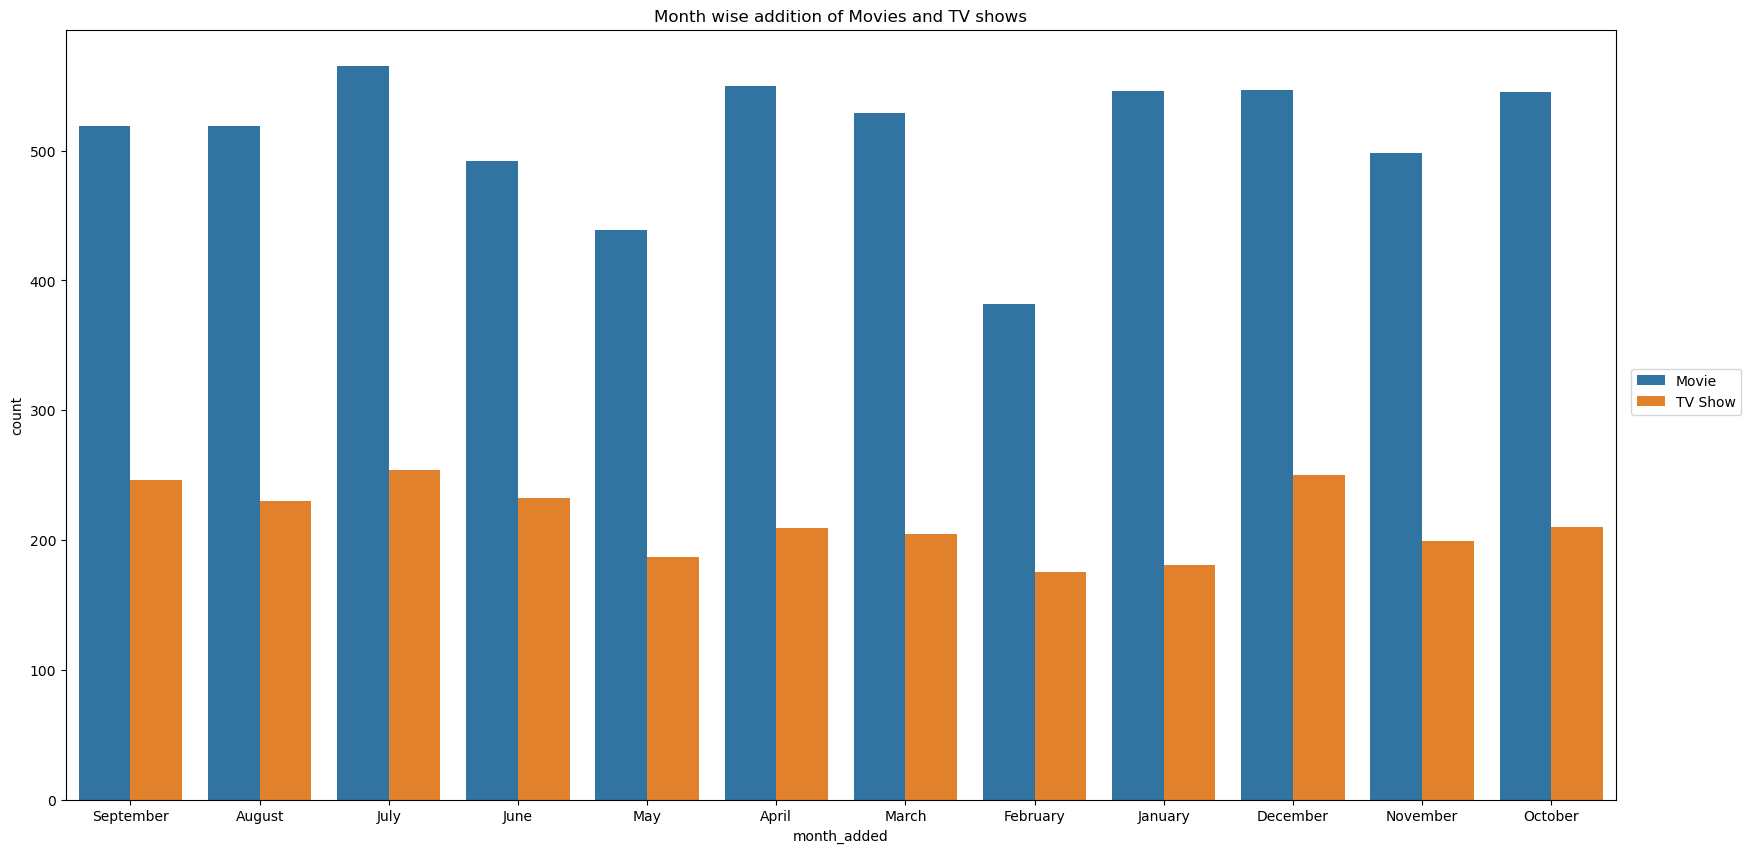

In [300]:
plt.figure(figsize=(20,10))
sns.countplot(x='month_added',data=dt,hue='type')
plt.title('Month wise addition of Movies and TV shows')
plt.legend(loc=(1.01,0.5))
plt.show()

- Based on the above plot, it appears that the month of July witnessed the highest number of content additions, followed closely by April. Conversely, the months of February and May recorded the fewest content additions.

In [301]:
# year_added column -> during which year the show was added on netflix

df1 = pd.DataFrame(df)
dt['year_added'] = pd.DatetimeIndex(df1.date_added).year
dt.year_added = dt.year_added.astype('Int64')

In [302]:
# adding most added year '2019' for NaN values
dt.isna().sum()
dt.year_added.fillna(dt.year_added.value_counts().index[0],inplace=True)
dt

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,Saturday
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,Friday
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September,Friday
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September,Friday
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,November,Wednesday
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,July,Monday
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,November,Friday
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,January,Saturday


- Adding year with NaN values with most number of year the contents were added

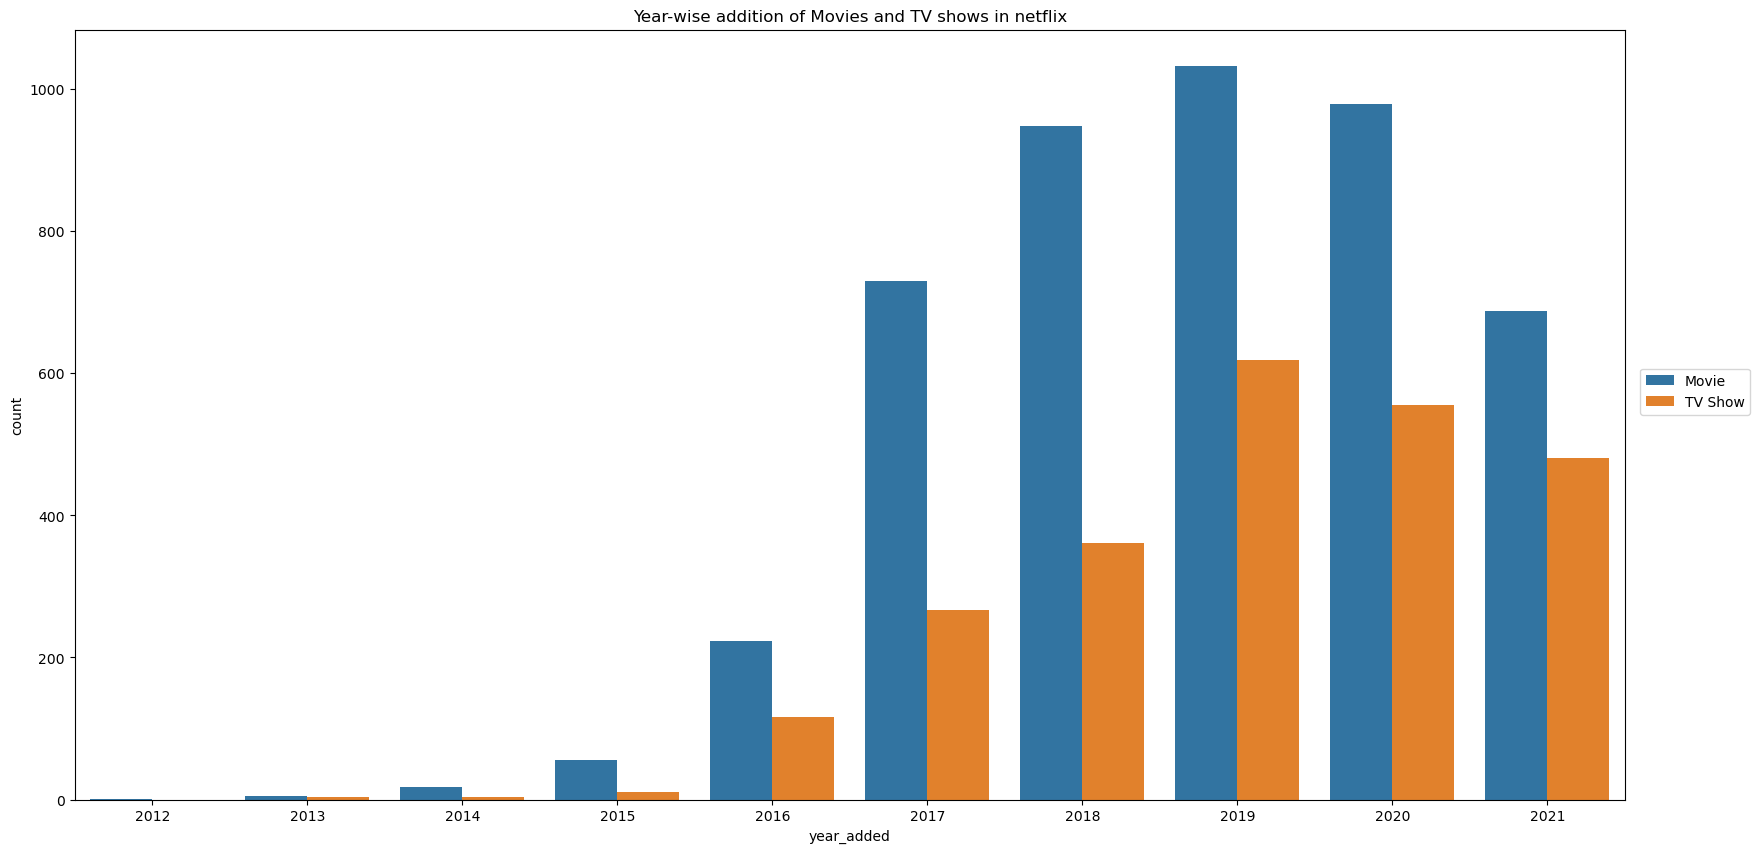

In [297]:
# Most shows added year on netflix between movies and TV shows
plt.figure(figsize=(20,10))
sns.countplot(x='year_added',data=df_year,hue='type')
plt.title('Year-wise addition of Movies and TV shows in netflix')
plt.legend(loc=(1.01,0.5))
plt.show()

- Most contents were added during the year 2019

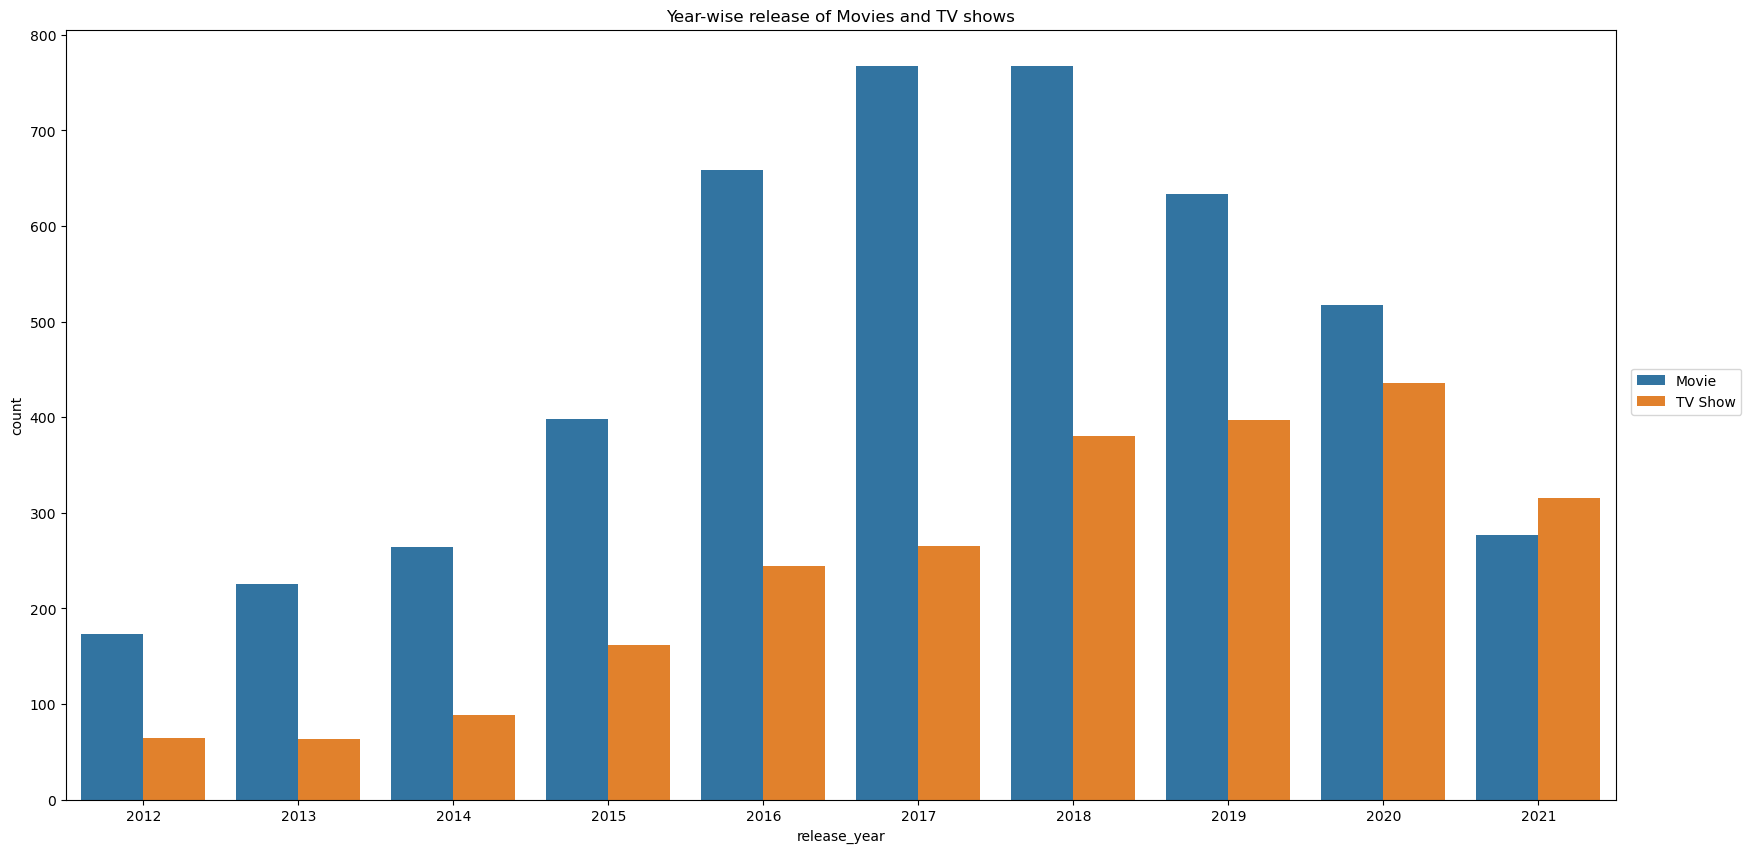

In [55]:
# Release difference between movies and TV shows for past 10 year window
plt.figure(figsize=(20,10))
df_year = dt.loc[dt['release_year']>2011]
sns.countplot(x='release_year',data=df_year,hue='type')
plt.title('Year-wise release of Movies and TV shows')
plt.legend(loc=(1.01,0.5))
plt.show()

- Most number of Movies and TV shows were released during year 2018 and 2020 respectively

In [57]:
dt.rating.isnull().sum() 

4

In [58]:
#4 null values in rating column

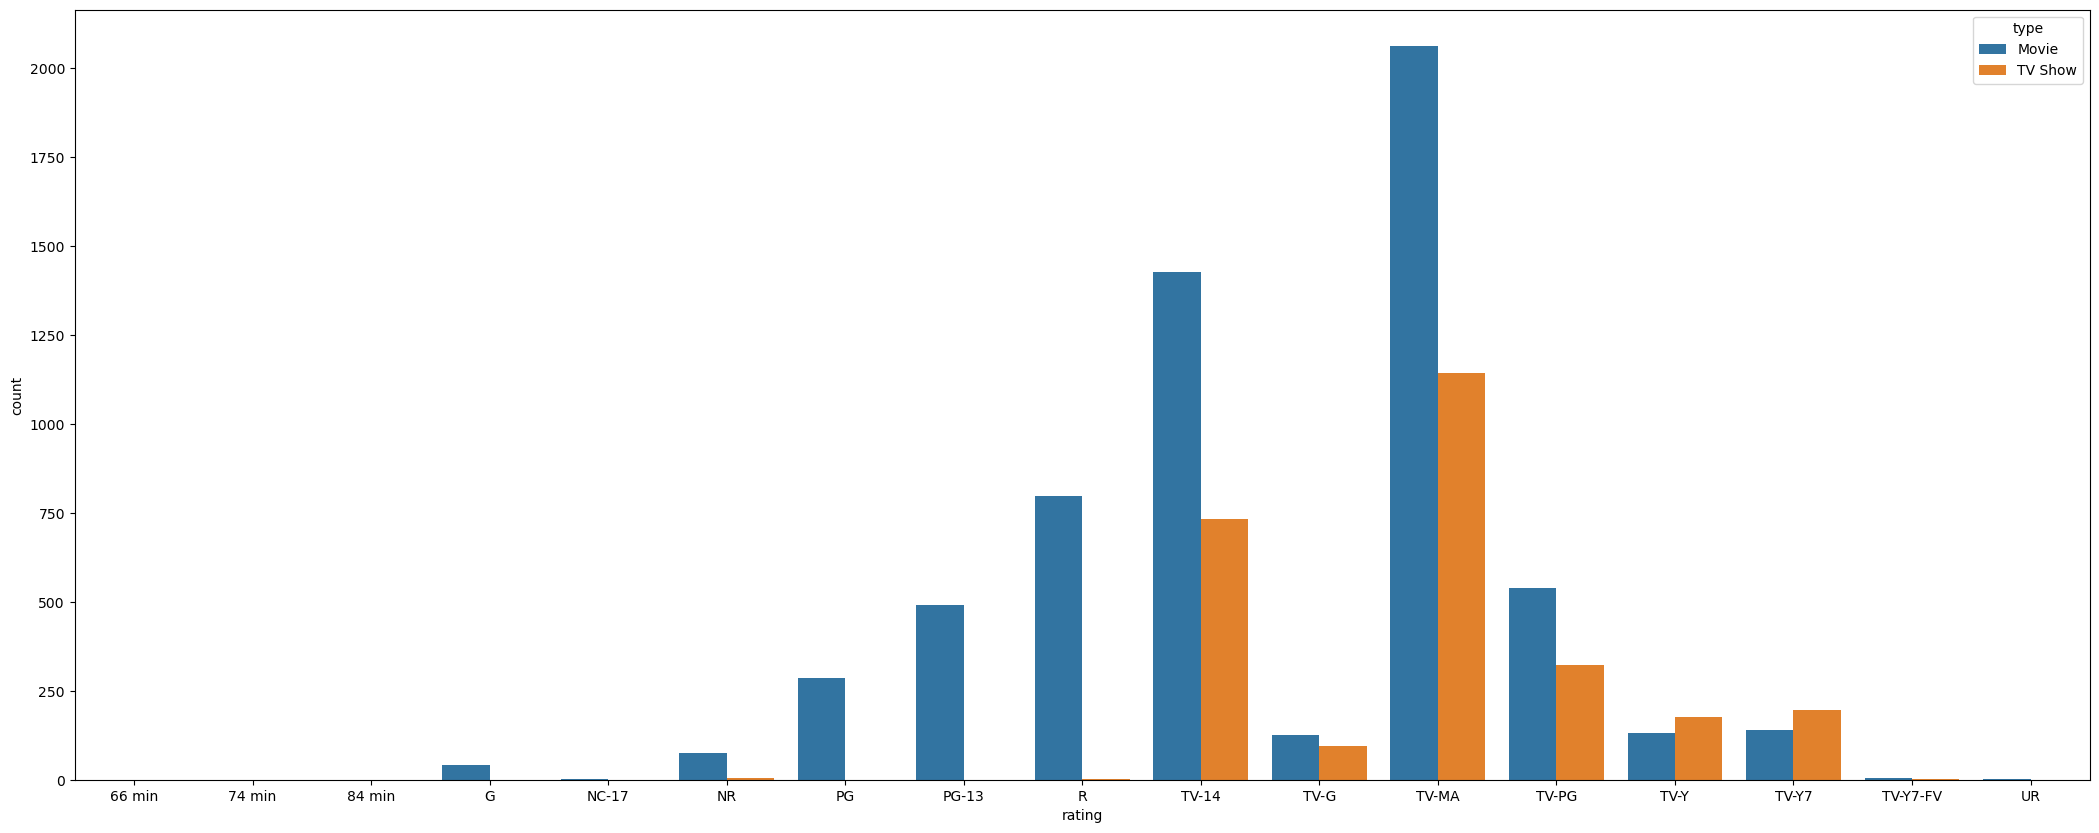

In [60]:
# Rating wise barchart for netflix
rating_list = ['PG-13','TV-MA','PG','TV-14','TV-PG','TV-Y','TV-Y7','R','TV-G','G','NC-17','NR','TV-Y7-FV','UR']
df_rating = dt[(dt.rating.isnull()==False) & (df.rating.apply(lambda x: x in rating_list))]
plt.figure(figsize=(26,10))
sns.countplot(x='rating',data=df_rating,hue='type')
plt.show()

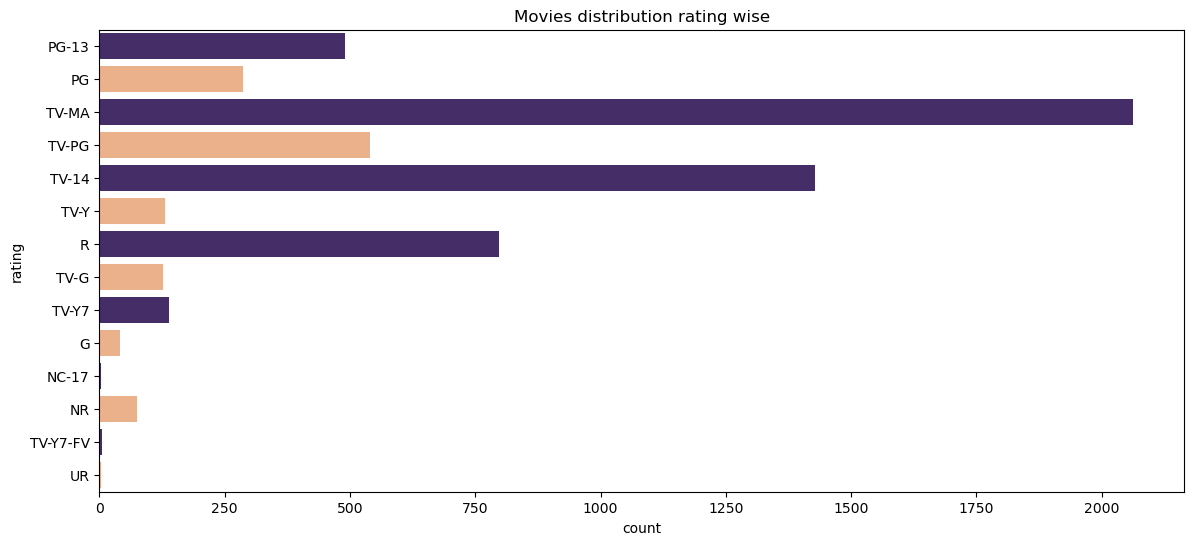

In [61]:
# countplot for Distributed Movie ratings
plt.figure(figsize=(14,6))
movies_ratingwise = df.loc[(df["type"] == "Movie") & (df.rating.apply(lambda x: x in rating_list)) , ["type" , "rating"]]
sns.countplot( y="rating" , data =movies_ratingwise,  palette=['#432371',"#FAAE7B"] )
plt.title("Movies distribution rating wise")
plt.show()

- Most movies are Rated TV-MA & TV-14

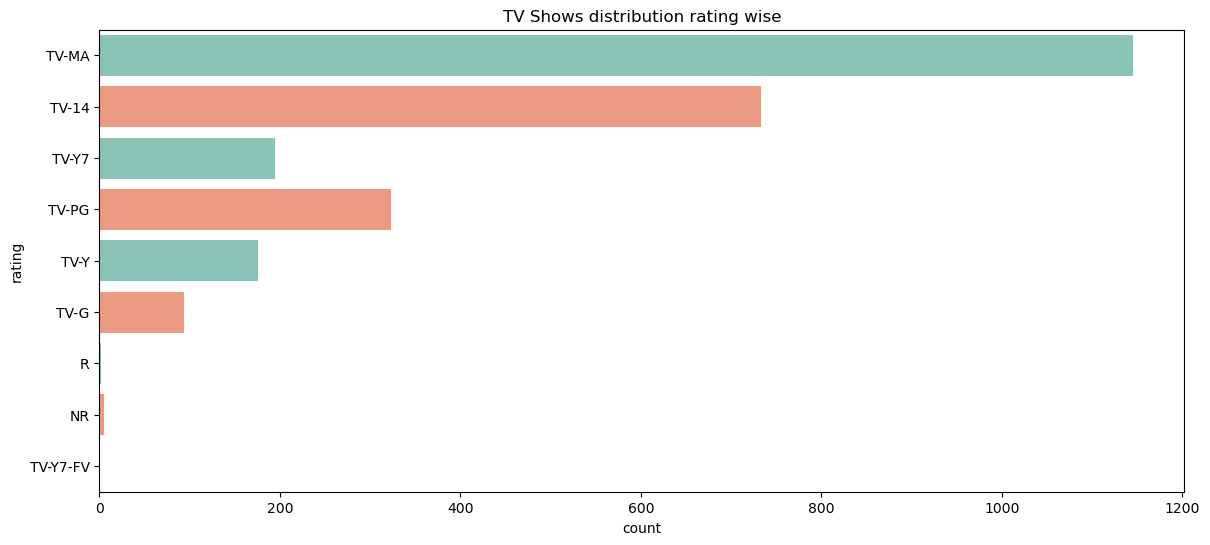

In [64]:
# countplot for Distributed TV Show ratings
plt.figure(figsize=(14,6))
tvshow_rating = df.loc[df["type"] == "TV Show" , ["type" , "rating"]]
sns.countplot( y="rating" , data =tvshow_rating,  palette=['#7fcdbb',"#fc9272"] )
plt.title("TV Shows distribution rating wise")
plt.show()

- Most TV shows are rated TV-MA

In [216]:
# exploding nested country column similarly
country = df["country"].apply(lambda x: str(x).split(", ")).tolist() #exploding the country column
df_country = pd.DataFrame(country, index = df["title"])
df_country = df_country.stack()
df_country = df_country.reset_index()
df_country.drop(columns = "level_1" , inplace = True)
df_country.columns = ["title" , "country"]
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845 entries, 0 to 10844
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    10845 non-null  object
 1   country  10845 non-null  object
dtypes: object(2)
memory usage: 169.6+ KB


In [217]:
df_country.head()

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India


In [218]:
country_tb = df[['show_id' , 'type' , 'country']]
country_tb.dropna(inplace = True)
country_tb['country'] = country_tb['country'].apply(lambda x : x.split(','))
country_tb = country_tb.explode('country')
country_tb

,show_id,type,country
0,s1,Movie,United States
1,s2,TV Show,South Africa
4,s5,TV Show,India
7,s8,Movie,United States
7,s8,Movie,Ghana
...,...,...,...
8801,s8802,Movie,Jordan
8802,s8803,Movie,United States
8804,s8805,Movie,United States
8805,s8806,Movie,United States


In [219]:
# some duplicate values are found, which have unnecessary spaces. some empty strings found
country_tb['country'] = country_tb['country'].str.strip()

In [220]:
country_tb.loc[country_tb['country'] == '']

,show_id,type,country
193,s194,TV Show,
365,s366,Movie,
1192,s1193,Movie,
2224,s2225,Movie,
4653,s4654,Movie,
5925,s5926,Movie,
7007,s7008,Movie,


In [221]:
country_tb = country_tb.loc[country_tb['country'] != '']

In [222]:
country_tb['country'].nunique()

122

Netflix has movies from the total 122 countries.

Total movies and tv shows in each country

In [223]:
x = country_tb.groupby(['country' , 'type'])['show_id'].count().reset_index()
x.pivot(index = ['country'] , columns = 'type' , values = 'show_id').sort_values('Movie',ascending = False)

type,Movie,TV Show
country,,
United States,2752.0,938.0
India,962.0,84.0
United Kingdom,534.0,272.0
Canada,319.0,126.0
France,303.0,90.0
...,...,...
Azerbaijan,NaN,1.0
Belarus,NaN,1.0
Cuba,NaN,1.0


In [224]:
# Lets check for top 10 countries
top_10_country = country_tb.country.value_counts().head(10).index
df_new = country_tb.loc[country_tb['country'].isin(top_10_country)]

In [225]:
x = df_new.groupby(['country' , 'type'])['show_id'].count().reset_index()
x.pivot(index = 'country' , columns = 'type' , values = 'show_id').sort_values('Movie',ascending = False)

type,Movie,TV Show
country,,
United States,2752,938
India,962,84
United Kingdom,534,272
Canada,319,126
France,303,90
Germany,182,44
Spain,171,61
Japan,119,199
Mexico,111,58


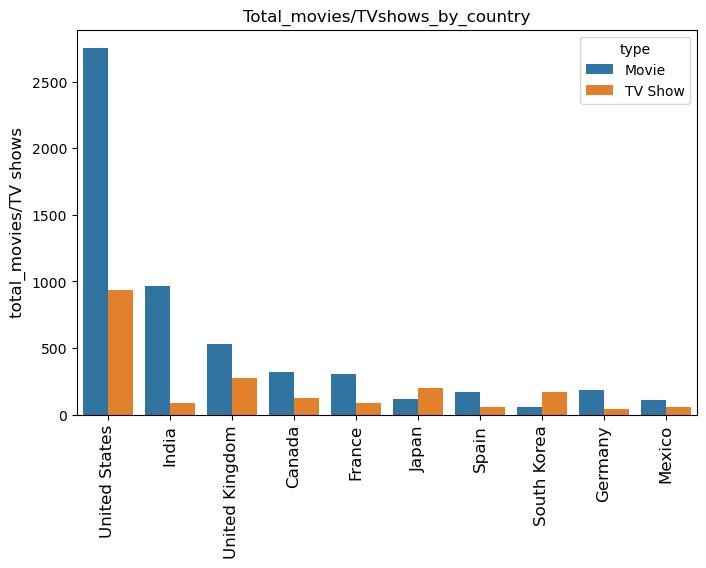

In [226]:
plt.figure(figsize= (8,5))
sns.countplot(data = df_new , x = 'country' , order = top_10_country , hue = 'type')
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('total_movies/TV shows' , fontsize = 12)
plt.xlabel('')
plt.title('Total_movies/TVshows_by_country')
plt.show()

In [227]:
top_10_country = country_tb.country.value_counts().head(10).index
country_tb['cat'] = country_tb['country'].apply(lambda x : x if x in top_10_country else 'Other Countries' )

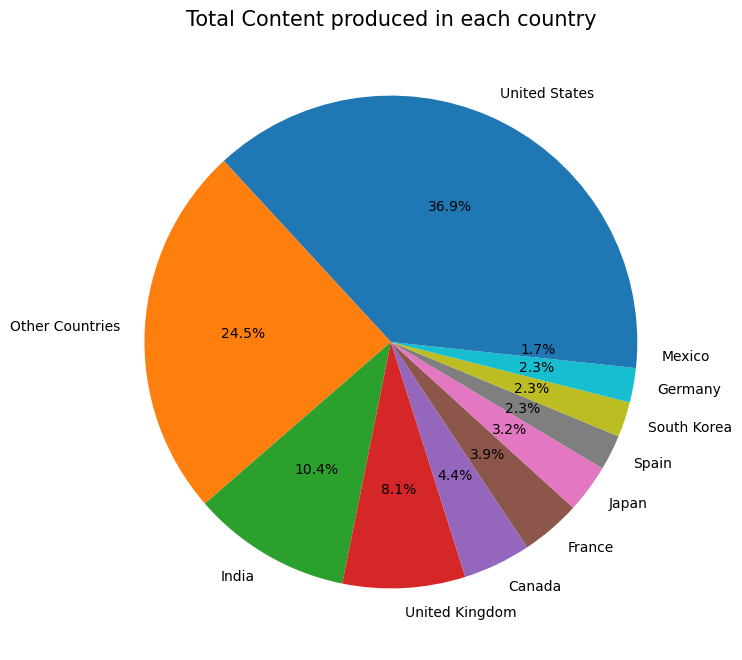

In [228]:
x = country_tb.cat.value_counts()

plt.figure(figsize = (8,8))
plt.pie(x , labels = x.index, autopct='%1.1f%%')
plt.title('Total Content produced in each country' , fontsize = 15)
plt.show()

- United States is the HIGHEST contributor country on Netflix, followed by India and United Kingdom.
- Maximum content of Netflix which is around 75% , is coming from these top 10 countries. Rest of the world only contributes 25% of the content.

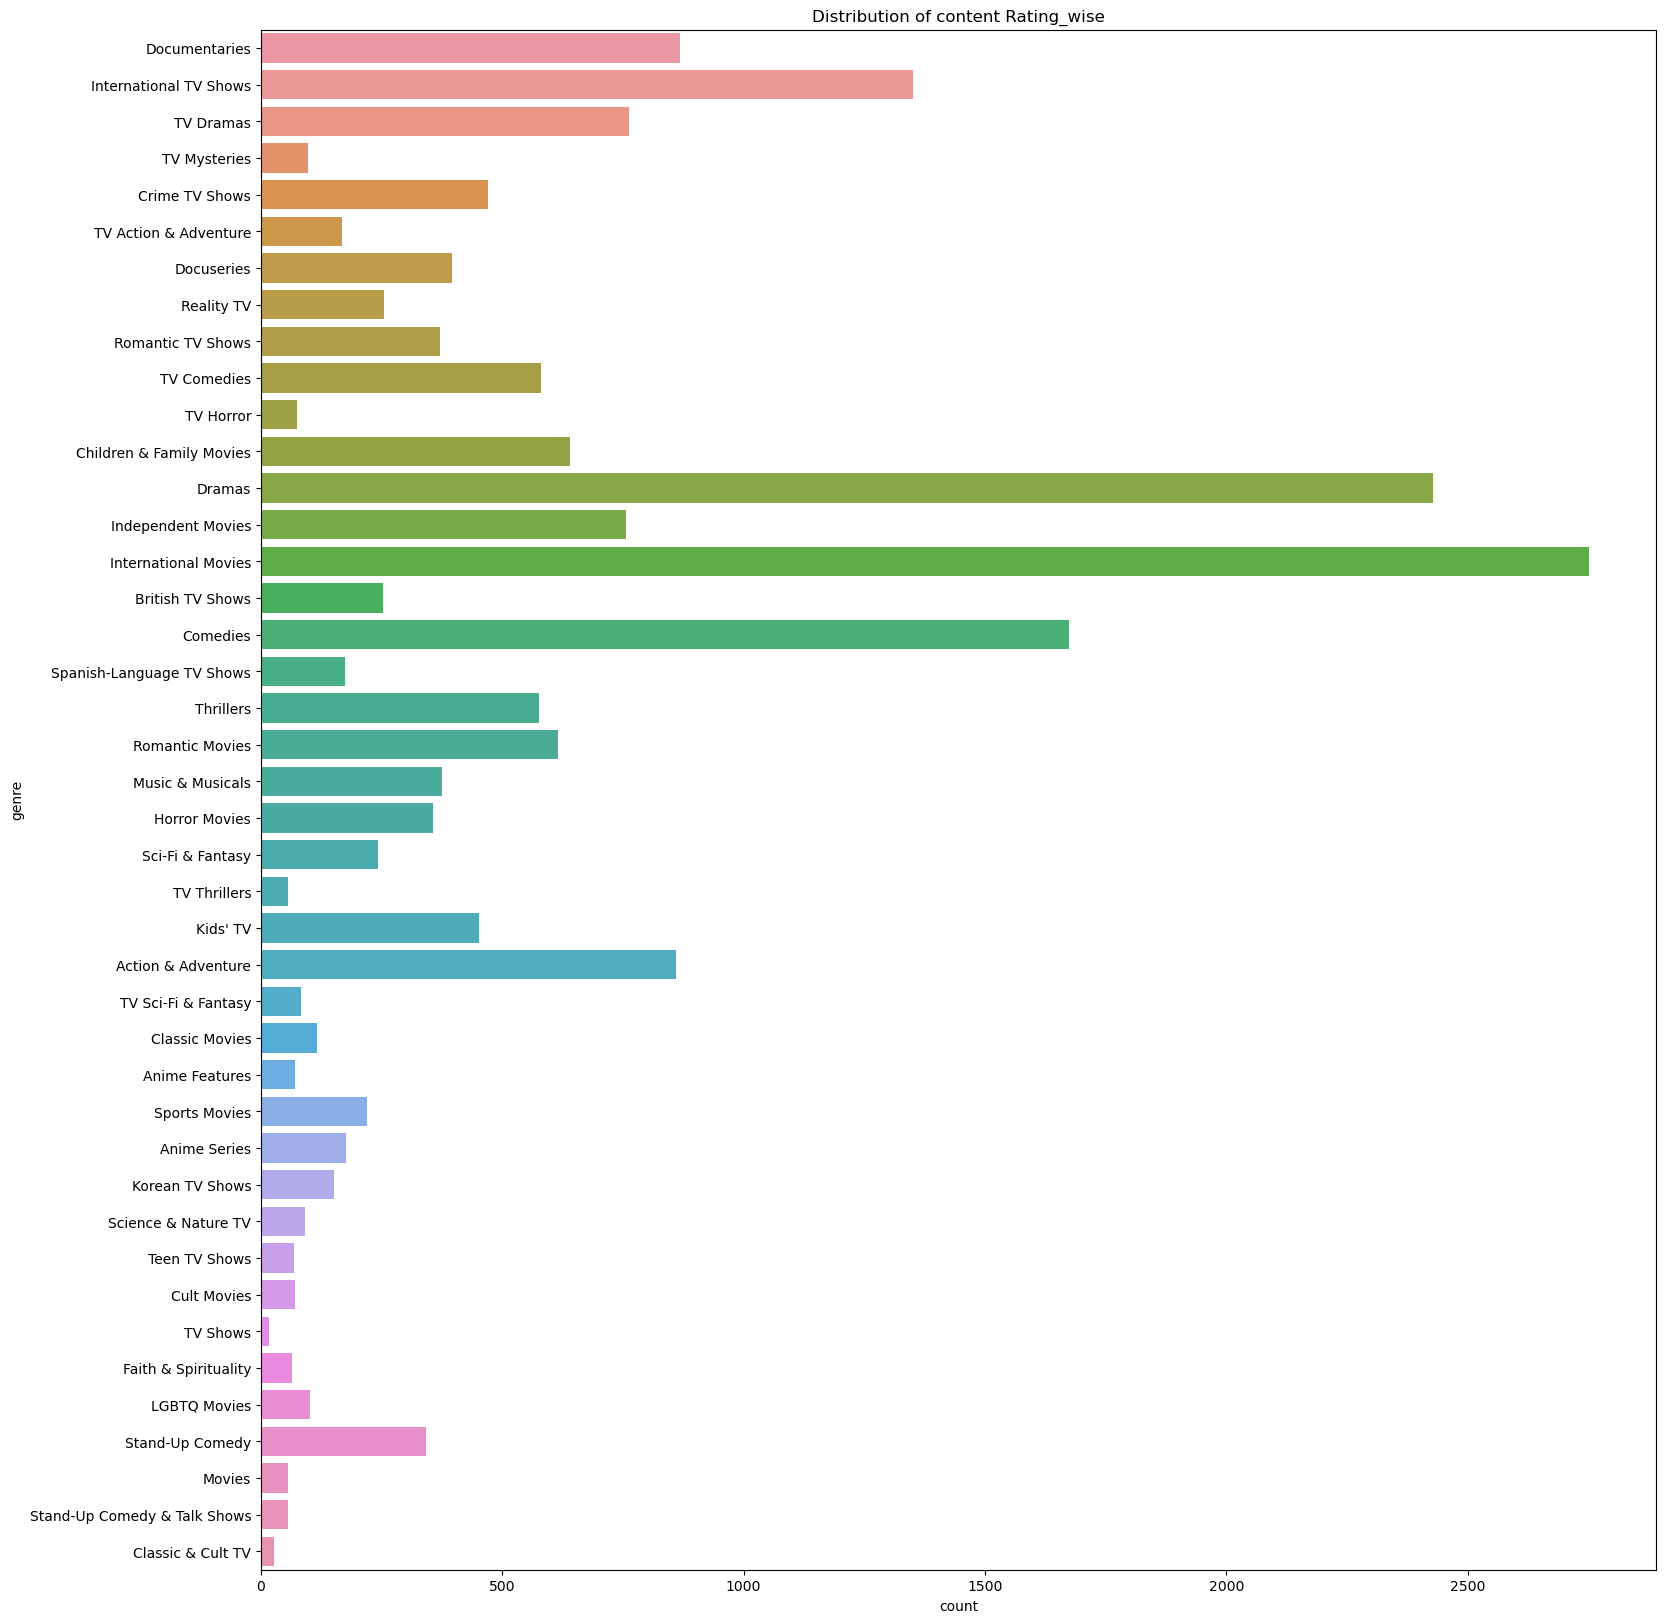

In [78]:
# Exploding genre Column
listed_in = df["listed_in"].apply(lambda x: str(x).split(", ")).tolist()
df_genre = pd.DataFrame(listed_in, index = df["title"])
df_genre = df_genre.stack()
df_genre = df_genre.reset_index()
df_genre.drop(columns = "level_1" , inplace = True)
df_genre.columns = ["title" , "genre"]
plt.figure(figsize = (18,20))
sns.countplot(y = "genre" , data =df_genre )
plt.title("Distribution of content Rating_wise")
plt.show()

- The most prevalent categories among Netflix movies and TV shows include:

1. International Movies
2. Dramas
3. Comedies
4. International TV Shows

<b> For categorical variable(s): Boxplot </b>

<Axes: title={'center': 'Duration for Movies'}>

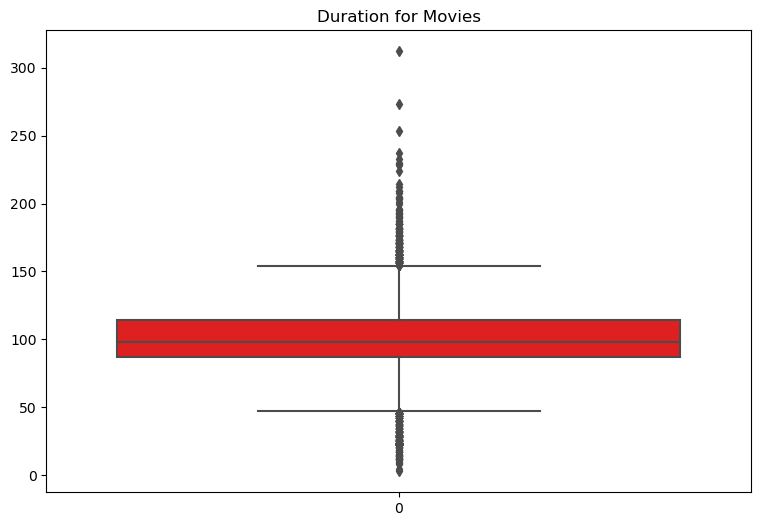

In [79]:
# Boxplot for duration of Movie
df = pd.read_csv('netflix.csv')
plt.figure(figsize=(20,6))
duration_df = df.loc[df.duration.str.contains("min")== True]['duration'].apply(lambda x: x.split()[0]).astype('Int64')
plt.subplot(1,2,1)
plt.title('Duration for Movies')
sns.boxplot(duration_df , color = "red")

- Average duration of movies are around 100 min

<b> For correlation: Heatmaps, Pairplots </b>

In [80]:
# Country-wise Rating of Content

In [101]:
x = top_20_country.merge(df , on = 'show_id').groupby(['country_x' , 'rating'])['show_id'].count().reset_index()

In [102]:
country_rating = x.pivot(index = ['country_x'] , columns = 'rating' , values = 'show_id')

Text(0.5, 1.0, 'Countries V/s Rating')

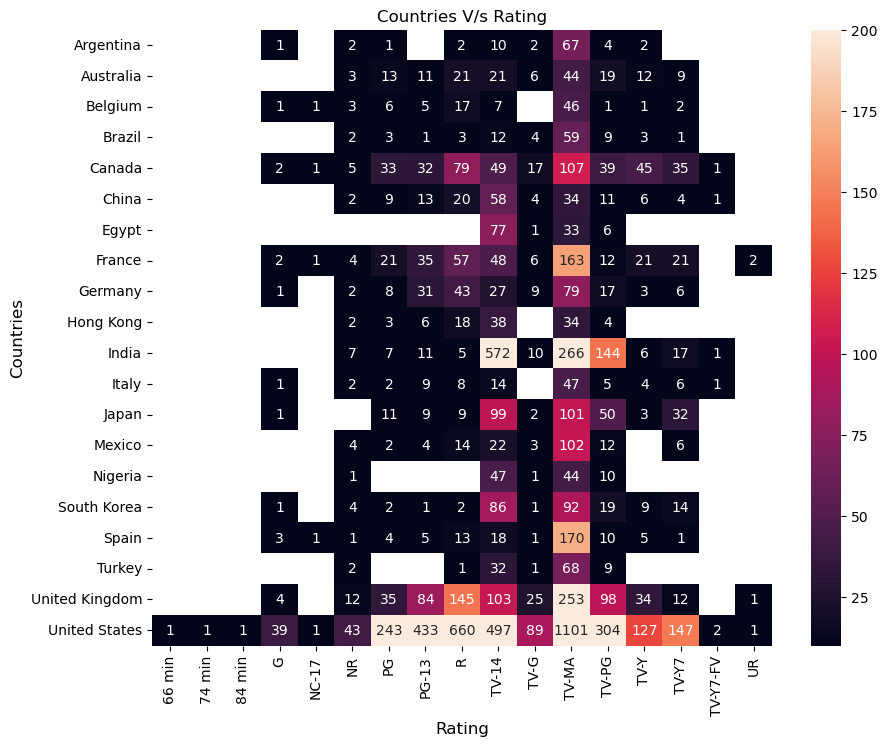

In [103]:
plt.figure(figsize = (10,8))
sns.heatmap(data = country_rating , annot = True , fmt=".0f"  , vmin = 10 , vmax=200)
plt.ylabel('Countries' , fontsize = 12)
plt.xlabel('Rating' , fontsize = 12)
plt.title('Countries V/s Rating' , fontsize = 12)

In [104]:
# Popular genre in top 20 countries

In [84]:
genre_tb = df[['show_id' , 'type', 'listed_in']]

In [85]:
genre_tb['listed_in'] = genre_tb['listed_in'].apply(lambda x : x.split(','))
genre_tb = genre_tb.explode('listed_in')
genre_tb['listed_in'] = genre_tb['listed_in'].str.strip()

In [86]:
genre_tb

,show_id,type,listed_in
0,s1,Movie,Documentaries
1,s2,TV Show,International TV Shows
1,s2,TV Show,TV Dramas
1,s2,TV Show,TV Mysteries
2,s3,TV Show,Crime TV Shows
...,...,...,...
8805,s8806,Movie,Children & Family Movies
8805,s8806,Movie,Comedies
8806,s8807,Movie,Dramas
8806,s8807,Movie,International Movies


In [87]:
genre_tb.listed_in.unique()

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

In [88]:
genre_tb.listed_in.nunique()

42

In [89]:
# Total 42 genre present in dataset

In [90]:
df.merge(genre_tb , on = 'show_id' ).groupby(['type_y'])['listed_in_y'].nunique()

type_y
Movie      20
TV Show    22
Name: listed_in_y, dtype: int64

In [91]:
# Movies have 20 genres and TV shows have 22 genres.

In [92]:
# total movies/TV shows in each genre
x = genre_tb.groupby(['listed_in' , 'type'])['show_id'].count().reset_index()
x.pivot(index = 'listed_in' , columns = 'type' , values = 'show_id').sort_index()

type,Movie,TV Show
listed_in,,
Action & Adventure,859.0,NaN
Anime Features,71.0,NaN
Anime Series,NaN,176.0
British TV Shows,NaN,253.0
Children & Family Movies,641.0,NaN
Classic & Cult TV,NaN,28.0
Classic Movies,116.0,NaN
Comedies,1674.0,NaN
Crime TV Shows,NaN,470.0


In [93]:
top_20_country = country_tb.country.value_counts().head(20).index
top_20_country = country_tb.loc[country_tb['country'].isin(top_20_country)]

In [94]:
x = top_20_country.merge(genre_tb , on = 'show_id').drop_duplicates()
country_genre = x.groupby([ 'country' , 'listed_in'])['show_id'].count().sort_values(ascending = False).reset_index()
country_genre = country_genre.pivot(index = 'listed_in' , columns = 'country' , values = 'show_id')

Text(0.5, 1.0, 'Countries V/s Genres')

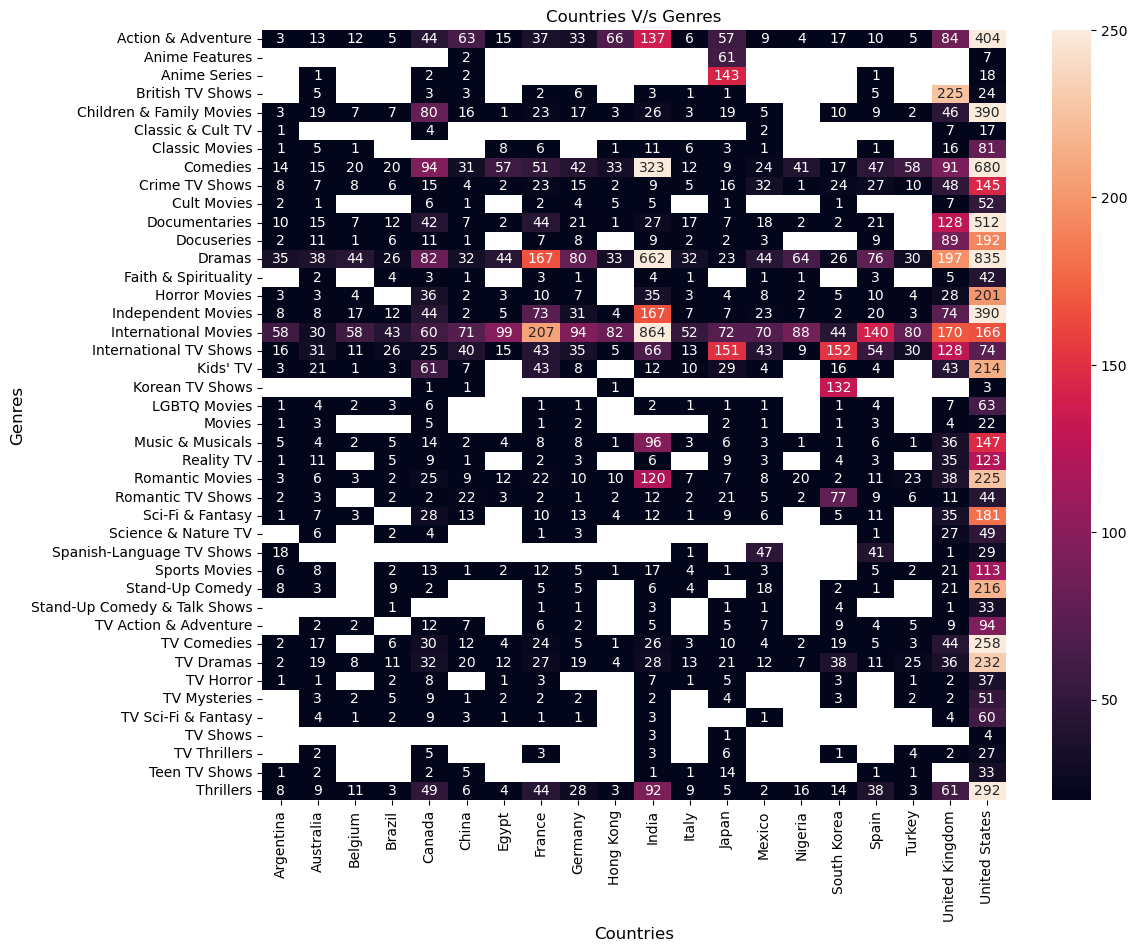

In [95]:
plt.figure(figsize = (12,10))
sns.heatmap(data = country_genre , annot = True , fmt=".0f" , vmin = 20 , vmax = 250 )
plt.xlabel('Countries' , fontsize = 12)
plt.ylabel('Genres' , fontsize = 12)
plt.title('Countries V/s Genres' , fontsize = 12)

- Popular genres across countries includes Action & Adventure, Children & Family Movies, Comedies, Dramas, International Movies & TV Shows, TV Dramas, Thrillers

- Additionally, specific genres are prominent in certain countries, such as Korean TV shows in Korea, British TV Shows in the UK, Anime features and Anime series in Japan, and Spanish TV Shows in Argentina, Mexico, and Spain.

- It is notable that the United States and the UK have a diverse range of genres represented, while India stands out for producing a significant number of International movies.

In [96]:
# Exploding cast column
cast_tb = df[['show_id' , 'type' ,'cast']]
cast_tb.dropna(inplace = True)
cast_tb['cast'] = cast_tb['cast'].apply(lambda x : x.split(','))
cast_tb = cast_tb.explode('cast')
cast_tb

,show_id,type,cast
1,s2,TV Show,Ama Qamata
1,s2,TV Show,Khosi Ngema
1,s2,TV Show,Gail Mabalane
1,s2,TV Show,Thabang Molaba
1,s2,TV Show,Dillon Windvogel
...,...,...,...
8806,s8807,Movie,Manish Chaudhary
8806,s8807,Movie,Meghna Malik
8806,s8807,Movie,Malkeet Rauni
8806,s8807,Movie,Anita Shabdish


In [97]:
cast_tb['cast'] = cast_tb['cast'].str.strip()

In [98]:
# checking empty strings
cast_tb[cast_tb['cast'] == '']

,show_id,type,cast


In [99]:
# Total actors on the Netflix
cast_tb.cast.nunique()

36439

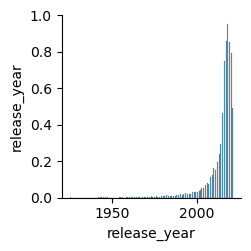

In [100]:
sns.pairplot(df)

# 5. Missing Value & Outlier check

In [258]:
# Dropping NaN Values
df = pd.read_csv('netflix.csv')
df1 = df.dropna(subset=['rating'])
df1 = df1.dropna(subset=['duration'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8800 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8800 non-null   object
 1   type          8800 non-null   object
 2   title         8800 non-null   object
 3   director      6169 non-null   object
 4   cast          7975 non-null   object
 5   country       7970 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8800 non-null   int64 
 8   rating        8800 non-null   object
 9   duration      8800 non-null   object
 10  listed_in     8800 non-null   object
 11  description   8800 non-null   object
dtypes: int64(1), object(11)
memory usage: 893.8+ KB


In [259]:
# filtering indices that has Null values all at once in country,cast, director columns
null_df = df1[['country','cast','director']].isna()
null_df = null_df[ (null_df['country']==True) & (null_df['cast']==True) & (null_df['director']==True) ]
index_to_drop = null_df.index
index_to_drop

Index([   3,   10,   14,   74,  123,  147,  181,  218,  224,  234,  242,  320,
        368,  369,  379,  404,  430,  465,  466,  490,  497,  549,  641,  653,
        710,  738,  761,  842,  851,  852,  854,  925,  936,  957, 1005, 1038,
       1056, 1094, 1095, 1116, 1224, 1225, 1723, 1828, 1889, 1890, 1952, 2101,
       2152, 2222, 2236, 2335, 2394, 2425, 2432, 2495, 2568, 2569, 2699, 2893,
       2982, 3393, 3394, 3395, 3396, 3397, 3469, 3539, 3592, 3789, 3837, 3953,
       3987, 4015, 4056, 4199, 4250, 4372, 4627, 4637, 4654, 5291, 5799, 5870,
       6389, 6618, 7017, 7222, 7438, 7483, 7624, 7812, 8109, 8199, 8609, 8803],
      dtype='int64')

In [260]:
# droping indices that was filtered indices, around 103 rows have been removed
df1 = df1.drop(index=index_to_drop)
df1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [261]:
# using above cleaned data, to add the added date and verifying the sum of null values in the column
df1["date_added"] = df1["date_added"].fillna(df1["release_year"])
df1["date_added"].isna().sum()

0

In [262]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8704 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8704 non-null   object
 1   type          8704 non-null   object
 2   title         8704 non-null   object
 3   director      6169 non-null   object
 4   cast          7975 non-null   object
 5   country       7970 non-null   object
 6   date_added    8704 non-null   object
 7   release_year  8704 non-null   int64 
 8   rating        8704 non-null   object
 9   duration      8704 non-null   object
 10  listed_in     8704 non-null   object
 11  description   8704 non-null   object
dtypes: int64(1), object(11)
memory usage: 884.0+ KB


In [263]:
# Imputation for directors
director_fill = df1.groupby(['type',"listed_in","country"])['director'].apply(lambda x: x.mode())
director_fill = director_fill.reset_index()
director_fill

,type,listed_in,country,level_3,director
0,Movie,Action & Adventure,"Australia, United States",0,Simon Wincer
1,Movie,Action & Adventure,"Bulgaria, United States",0,Todor Chapkanov
2,Movie,Action & Adventure,Canada,0,Adam Alleca
3,Movie,Action & Adventure,Canada,1,Allan Ungar
4,Movie,Action & Adventure,Canada,2,Brett Donowho
...,...,...,...,...,...
3195,TV Show,TV Shows,Japan,0,"Kobun Shizuno, Hiroyuki Seshita"
3196,TV Show,TV Shows,Saudi Arabia,0,"Ali Kalthami, Meshal Aljaser, Faris Godus, Moh..."
3197,TV Show,TV Shows,United States,0,"Joe Berlinger, Bruce Sinofsky"
3198,TV Show,TV Shows,United States,1,"Oscar Micheaux, Spencer Williams, Richard E. N..."


In [264]:
df1 = df1.merge(director_fill, on = ["type","listed_in","country" ] , how = 'left')
df1["director"] = np.where(df1["director_x"].isna(), df1["director_y"], df1["director_x"])
df1 = df1[["show_id","type","title","director","cast","country","date_added","release_year","rating","duration","listed_in","description"]]
df1

df1 = df1.drop_duplicates( subset='show_id' )

df2 = df1.merge(director_fill[['type',"listed_in","director"]], on = ["type","listed_in"] , how = 'left')
df2["director"] = np.where(df2["director_x"].isna(), df2["director_y"], df2["director_x"])
df2 = df2[["show_id","type","title","director","cast","country","date_added","release_year","rating","duration","listed_in","description"]]
df2

df2 = df2.drop_duplicates( subset='show_id' )

df3 = df2.merge(director_fill[['type',"director"]], on = ["type"] , how = 'left')
df3["director"] = np.where(df3["director_x"].isna(), df3["director_y"], df3["director_x"])
df3 = df3[["show_id","type","title","director","cast","country","date_added","release_year","rating","duration","listed_in","description"]]
df3

df3 = df3.drop_duplicates(subset='show_id')

df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8704 entries, 0 to 18958929
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8704 non-null   object
 1   type          8704 non-null   object
 2   title         8704 non-null   object
 3   director      8704 non-null   object
 4   cast          7975 non-null   object
 5   country       7970 non-null   object
 6   date_added    8704 non-null   object
 7   release_year  8704 non-null   int64 
 8   rating        8704 non-null   object
 9   duration      8704 non-null   object
 10  listed_in     8704 non-null   object
 11  description   8704 non-null   object
dtypes: int64(1), object(11)
memory usage: 884.0+ KB


In [265]:
df3['director'].isna().sum() 

0

In [266]:
# 0 Nan values in Directors column

In [267]:
# Imputation for cast
cast_fill = df1.groupby(['type',"listed_in","country"])['cast'].apply(lambda x: x.mode())
cast_fill = cast_fill.reset_index()
cast_fill

,type,listed_in,country,level_3,cast
0,Movie,Action & Adventure,"Australia, United States",0,"Tom Selleck, Laura San Giacomo, Alan Rickman, ..."
1,Movie,Action & Adventure,"Bulgaria, United States",0,"Scott Adkins, Teodora Duhovnikova, Alon Aboutb..."
2,Movie,Action & Adventure,Canada,0,"Cole Hauser, Bruce Willis, Shawn Ashmore, Asht..."
3,Movie,Action & Adventure,Canada,1,"Dominic Purcell, Cody Hackman, Stephen Lang, T..."
4,Movie,Action & Adventure,Canada,2,"Jason Momoa, Garret Dillahunt, Jill Wagner, St..."
...,...,...,...,...,...
6470,TV Show,TV Shows,India,0,"Rahman, Havish, Regina Cassandra, Nandita Swet..."
6471,TV Show,TV Shows,India,1,"Suriya, Vijay Sethupathi, Revathy, Prakash Raj..."
6472,TV Show,TV Shows,Japan,0,"Mamoru Miyano, Takahiro Sakurai, Kana Hanazawa..."
6473,TV Show,TV Shows,Saudi Arabia,0,"Moayad Alnefaie, Mohammed Alhamdan, Citi Bet B..."


In [268]:
df1 = df1.merge(cast_fill, on = ["type","listed_in","country" ] , how = 'left')
df1["cast"] = np.where(df1["cast_x"].isna(), df1["cast_y"], df1["cast_x"])
df1 = df1[["show_id","type","title","director","cast","country","date_added","release_year","rating","duration","listed_in","description"]]
df1

df1 = df1.drop_duplicates( subset='show_id' )

df2 = df1.merge(cast_fill[['type',"listed_in","cast"]], on = ["type","listed_in"] , how = 'left')
df2["cast"] = np.where(df2["cast_x"].isna(), df2["cast_y"], df2["cast_x"])
df2 = df2[["show_id","type","title","director","cast","country","date_added","release_year","rating","duration","listed_in","description"]]
df2

df2 = df2.drop_duplicates( subset='show_id' )

df3 = df2.merge(cast_fill[['type',"cast"]], on = ["type"] , how = 'left')
df3["cast"] = np.where(df3["cast_x"].isna(), df3["cast_y"], df3["cast_x"])
df3 = df3[["show_id","type","title","director","cast","country","date_added","release_year","rating","duration","listed_in","description"]]
df3

df3 = df3.drop_duplicates(subset='show_id')

df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8704 entries, 0 to 33369933
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8704 non-null   object
 1   type          8704 non-null   object
 2   title         8704 non-null   object
 3   director      7066 non-null   object
 4   cast          8704 non-null   object
 5   country       7970 non-null   object
 6   date_added    8704 non-null   object
 7   release_year  8704 non-null   int64 
 8   rating        8704 non-null   object
 9   duration      8704 non-null   object
 10  listed_in     8704 non-null   object
 11  description   8704 non-null   object
dtypes: int64(1), object(11)
memory usage: 884.0+ KB


In [269]:
df3['cast'].isna().sum()

0

In [270]:
# 0 Nan values in Cast column

In [271]:
# Imputation for country 
country_fill = df1.groupby(["cast","director"])['country'].apply(lambda x: x.mode())
country_fill = country_fill.reset_index()
country_fill

,cast,director,level_2,country
0,"50 Cent, Ryan Phillippe, Bruce Willis, Rory Ma...",Mike Gunther,0,United States
1,"A.J. LoCascio, Sendhil Ramamurthy, Fred Tatasc...",Michael D. Black,0,United States
2,A.R. Rahman,Rudradeep Bhattacharjee,0,India
3,"Aadhi, Tapsee Pannu, Ritika Singh, Vennela Kis...",Dharmesh Darshan,0,India
4,"Aadhi, Tapsee Pannu, Ritika Singh, Vennela Kis...",Hari Nath,0,India
...,...,...,...,...
6310,"Úrsula Corberó, Álvaro Cervantes, Najwa Nimri,...",Julio Medem,0,Spain
6311,"İbrahim Büyükak, Zeynep Koçak, Gupse Özay, Cen...",Bedran Güzel,0,Turkey
6312,"Şahin Irmak, İrem Sak, Gonca Vuslateri, Emre K...",Hakan Algül,0,Turkey
6313,"Şükrü Özyıldız, Aslı Enver, Şenay Gürler, Başa...",Neslihan Yesilyurt,0,Turkey


In [272]:
df1 = df1.merge(country_fill, on = ["cast","director"] , how = 'left')
df1["country"] = np.where(df1["country_x"].isna(), df1["country_y"], df1["country_x"])
df1 = df1[["show_id","type","title","director","cast","country","date_added","release_year","rating","duration","listed_in","description"]]
df1

df1 = df1.drop_duplicates( subset='show_id' )

df2 = df1.merge(country_fill[["country","cast"]], on = ["cast"] , how = 'left')
df2["country"] = np.where(df2["country_x"].isna(), df2["country_y"], df2["country_x"])
df2 = df2[["show_id","type","title","director","cast","country","date_added","release_year","rating","duration","listed_in","description"]]
df2

df2 = df2.drop_duplicates( subset='show_id' )


df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8704 entries, 0 to 28104
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8704 non-null   object
 1   type          8704 non-null   object
 2   title         8704 non-null   object
 3   director      7066 non-null   object
 4   cast          8464 non-null   object
 5   country       8030 non-null   object
 6   date_added    8704 non-null   object
 7   release_year  8704 non-null   int64 
 8   rating        8704 non-null   object
 9   duration      8704 non-null   object
 10  listed_in     8704 non-null   object
 11  description   8704 non-null   object
dtypes: int64(1), object(11)
memory usage: 884.0+ KB


In [273]:
m = df['country'].mode()[0]
df2["country"] = df2['country'].fillna(m)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8704 entries, 0 to 28104
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8704 non-null   object
 1   type          8704 non-null   object
 2   title         8704 non-null   object
 3   director      7066 non-null   object
 4   cast          8464 non-null   object
 5   country       8704 non-null   object
 6   date_added    8704 non-null   object
 7   release_year  8704 non-null   int64 
 8   rating        8704 non-null   object
 9   duration      8704 non-null   object
 10  listed_in     8704 non-null   object
 11  description   8704 non-null   object
dtypes: int64(1), object(11)
memory usage: 884.0+ KB


In [274]:
df.drop(df.loc[df['date_added'].isna()].index , axis = 0 , inplace = True)

In [275]:
df['date_added'].value_counts()

date_added
January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 4, 2016       1
November 21, 2016      1
November 19, 2016      1
November 17, 2016      1
January 11, 2020       1
Name: count, Length: 1767, dtype: int64

In [276]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['date_added']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8797, dtype: datetime64[ns]

In [277]:
df2['date_added'] = pd.to_datetime(df2['date_added'], errors='coerce')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8704 entries, 0 to 28104
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8704 non-null   object        
 1   type          8704 non-null   object        
 2   title         8704 non-null   object        
 3   director      7066 non-null   object        
 4   cast          8464 non-null   object        
 5   country       8704 non-null   object        
 6   date_added    8606 non-null   datetime64[ns]
 7   release_year  8704 non-null   int64         
 8   rating        8704 non-null   object        
 9   duration      8704 non-null   object        
 10  listed_in     8704 non-null   object        
 11  description   8704 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 884.0+ KB


In [278]:
df2 = df2.reset_index(drop=True)
df2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Craig Sechler,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
4,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8699,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8700,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8701,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8702,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [279]:
df2 = df2.reset_index(drop=True)
df2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Craig Sechler,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
4,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8699,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8700,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8701,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8702,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


<b> Histogram for Univariate Analysis </b>

In [280]:
# After imputation/cleaning data from NaN values are completed
# Now Movies released after 1990 is filtered
released_movies = df2[ (df2['release_year'] > 1990)   &  (df2['type'] == "Movie")  ]['release_year']
released_movies

0       2020
5       2021
6       1993
8       2021
10      2021
        ... 
8699    2015
8700    2007
8701    2009
8702    2006
8703    2015
Name: release_year, Length: 5855, dtype: int64

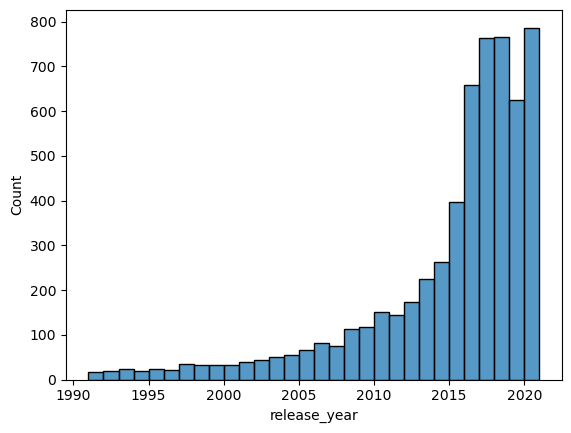

In [281]:
# After filtering released Movies count is represented in histogram
sns.histplot(data=released_movies , bins=30 , )
plt.show()

- Most number of movies are released during 2020

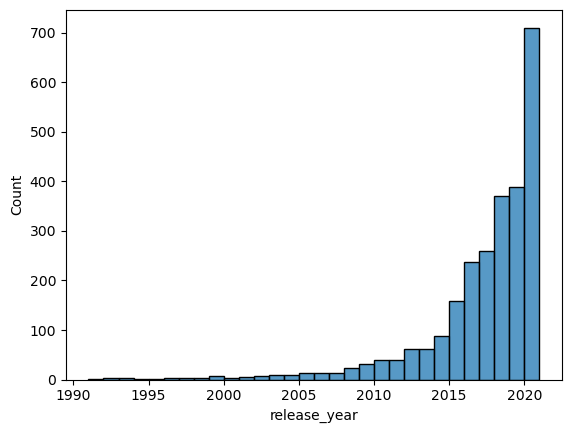

In [282]:
# Similarly filtering and returning histogram for TV shows released after 1990
released_tv = df2[ (df2['release_year'] > 1990)   &  (df2['type'] == "TV Show")  ]['release_year']
sns.histplot(data=released_tv , bins=30 , )
plt.show()

- There is sharp rise of TV shows released in 2020

# 6. Insights based on Non-Graphical and Visual Analysis

In [283]:
# creating country column
country = df["country"].apply(lambda x: str(x).split(", ")).tolist()
df_country = pd.DataFrame(country, index = df["title"])
df_country = df_country.stack()
df_country = df_country.reset_index()
df_country.drop(columns = "level_1" , inplace = True)
df_country.columns = ["title" , "country"]
df_country = df_country.loc[df_country.country!='nan']
df_country

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
4,Kota Factory,India
7,Sankofa,United States
8,Sankofa,Ghana
...,...,...
10829,Zinzana,Jordan
10830,Zodiac,United States
10832,Zombieland,United States
10833,Zoom,United States


In [284]:
# expanding nested directors column
director = df["director"].apply(lambda x : str(x).split(", ")).tolist()
df_director = pd.DataFrame(director, index = df["title"])
df_director= df_director.stack()
df_director = df_director.reset_index()
df_director.drop(columns ="level_1" , inplace = True)
df_director.columns = ["title" , "director"]
df_fav_director = df.merge(df_director , on = "title" )
df_fav_director

,show_id,type,title,director_x,cast,country,date_added,release_year,rating,duration,listed_in,description,director_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Kirsten Johnson
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",nan
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Julien Leclercq
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",nan
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9597,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",David Fincher
9598,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",nan
9599,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Ruben Fleischer
9600,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Peter Hewitt


In [303]:
#merging favorite director and filter country data
director_countrywise= df_fav_director.merge(df_country , on = "title")
director_countrywise= director_countrywise.drop(columns = ["director_x" , "country_x" ])
director_countrywise.rename(columns = {"director_y": "director" , "country_y" : "country"}, inplace = True)
director_countrywise = director_countrywise.loc[director_countrywise["director"] != "Unknown"]
director_countrywise.reset_index(inplace= True)
director_countrywise.head()

,index,show_id,type,title,cast,date_added,release_year,rating,duration,listed_in,description,director,country
0,0,s1,Movie,Dick Johnson Is Dead,NaN,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Kirsten Johnson,United States
1,1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",nan,South Africa
2,2,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,nan,India
3,3,s8,Movie,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Haile Gerima,United States
4,4,s8,Movie,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Haile Gerima,Ghana


In [304]:
country = director_countrywise['country'].value_counts()[:6].index.tolist()
print(' Top 2 Directors of Top 5 Countries')
print('\n')
for val in country:
  if val != 'Unknown':
    print(f'**{val}**')
    print(director_countrywise.loc[director_countrywise['country']==val, 'director'].value_counts()[:2])
    print('\n')

 Top 2 Directors of Top 5 Countries


**United States**
director
nan             934
Marcus Raboy     15
Name: count, dtype: int64


**India**
director
nan               85
Anurag Kashyap     9
Name: count, dtype: int64


**United Kingdom**
director
nan                    266
Alastair Fothergill      4
Name: count, dtype: int64


**Canada**
director
nan               128
Justin G. Dyck      8
Name: count, dtype: int64


**France**
director
nan               82
Thierry Donard     5
Name: count, dtype: int64


**Japan**
director
nan                  187
Toshiya Shinohara      7
Name: count, dtype: int64




- Anurag Kashyap and David Dhawan stand out as two of the most renowned directors in India.
- Jay Karas and Marcus Raboy enjoy significant popularity in the United States.

In [305]:
director_countrywise["director"].value_counts().head()

director
nan                 2552
Jan Suter             21
Raúl Campos           19
Martin Scorsese       18
Steven Spielberg      18
Name: count, dtype: int64

- Jan Suter has worked for the highest number of movies

In [306]:
# unnesting cast column
cast = df["cast"].apply(lambda x : str(x).split(", ")).tolist()
df_cast = pd.DataFrame(cast,  index = df["title"])
df_cast = df_cast.stack()
df_cast = df_cast.reset_index()
df_cast.drop(columns = "level_1" , inplace = True)
df_cast.columns = ["title" , "cast"]
df_fav_cast = df.merge(df_cast , on = "title" )

In [307]:
cast_countrywise= df_fav_cast.merge(df_country , on = "title")
cast_countrywise= cast_countrywise.drop(columns = ["cast_x" , "country_x"])
cast_countrywise = cast_countrywise.rename(columns = {"cast_y" : "cast" , "country_y" : "country"})
cast_countrywise = cast_countrywise.loc[cast_countrywise["cast"] != "Unknown"].reset_index() 
cast_countrywise.head()

,index,show_id,type,title,director,date_added,release_year,rating,duration,listed_in,description,cast,country
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",nan,United States
1,1,s2,TV Show,Blood & Water,NaN,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa
2,2,s2,TV Show,Blood & Water,NaN,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Khosi Ngema,South Africa
3,3,s2,TV Show,Blood & Water,NaN,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Gail Mabalane,South Africa
4,4,s2,TV Show,Blood & Water,NaN,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Thabang Molaba,South Africa


In [308]:
country_actor = cast_countrywise['country'].value_counts()[:6].index.tolist()
print(' Top 2 Actors of Top 5 Countries')
print('\n')
for val in country:
  if val != 'Unknown':
    print(f'--{val}--')
    print(cast_countrywise.loc[cast_countrywise['country']==val, 'cast'].value_counts()[:2])
    print('\n')

 Top 2 Actors of Top 5 Countries


--United States--
cast
nan            406
Tara Strong     22
Name: count, dtype: int64


--India--
cast
Anupam Kher    40
nan            39
Name: count, dtype: int64


--United Kingdom--
cast
nan                   96
David Attenborough    17
Name: count, dtype: int64


--Canada--
cast
nan           31
Robb Wells    14
Name: count, dtype: int64


--France--
cast
nan               32
Wille Lindberg     5
Name: count, dtype: int64


--Japan--
cast
Takahiro Sakurai    29
Yuki Kaji           28
Name: count, dtype: int64




- Anupam Kher and Shah Rukh Khan are the top actors in India
- Tara Strong and Samuel L. Jackson are top actors in US

In [309]:
# Top 5 Actors
cast_countrywise["cast"].value_counts().head(6)

cast
nan                   850
Anupam Kher            46
David Attenborough     45
Tara Strong            39
John Cleese            39
Shah Rukh Khan         37
Name: count, dtype: int64

- These are the top 5 most famous actors

# Insights based on Non-Graphical and Visual Analysis

- Netflix boasts a diverse content library, with movies constituting approximately 70% of its offerings, while TV shows make up the remaining 30%.
- The movies and TV shows uploading on the Netflix started from the year 2008, It had very lesser content till 2014.
- Year 2015 marks the drastic surge in the content getting uploaded on Netflix. It continues the uptrend since then and 2019 marks the highest number of movies and TV shows added on the Netflix. Year 2020 and 2021 has seen the drop in content added on Netflix.
- Since 2018, there has been a decline in movie uploads, contrasting with the steady rise in TV shows, eventually surpassing movies in mid-2020, indicating the growing popularity of TV content.
- Netflix features works from a vast array of directors, totaling 4993 globally. The United States leads with nearly 37% of all content contributions. Release years typically range from 2005 to 2021.
- Movies typically span 50 to 150 minutes, while TV shows generally range from 1 to 3 seasons. Ratings cater to various viewer demographics, with 'TV-MA' being the most common for mature audiences.
- Across countries, the availability of content varies, with some ratings such as 'TV-Y7,' 'TV-G,' and 'PG' being less prevalent outside the US.
- Top genres globally include International Movies and TV Shows, Dramas, and Comedies. While most countries favor genre-specific content, the US offers a diverse mix of genres.
- Indian actors feature prominently in Netflix content, with the top five actors based on the quantity of movies.

# Business Insights

- Netflix predominantly features content released after the year 2000, with a noticeable scarcity of content older than this threshold. The absence of such content may leave senior citizens underserved, as they could be a potential target audience for classic titles.

- A significant majority (over 80%) of Netflix's content falls under the following ratings:

    - TV-MA: Intended for mature audiences aged 17 and above.
    - TV-14: Suitable for viewers aged 14 and above.
    - TV-PG: Parental guidance suggested (similar to ratings like PG-13 and PG).
    - R: Restricted content, potentially unsuitable for viewers under the age of 17.
    
- Netflix content is mostly availabe for adults only. These ratings movies target Matured and Adult audience. Rest 20% of the content is for kids aged below 13. It shows that Netflix is currently serving mostly Mature audiences or Children with parental guidance.

- Most popular genres in recent years are International movies, Dramas, Comedies, International TV Shows and Action & Adventure.
- Approximately 75% of Netflix's content originates from the top 10 contributing countries
- Mostly movies are of "100 min" duration and mostly TV shows are having season 1 and season 2 respectively.

# Recommendations

- Experiment with interactive content formats, such as choose-your-own-adventure narratives or interactive storytelling, to enhance viewer engagement.
- Increase the variety of international movies and comedies for the United States and India.
- Focus on producing successful TV shows with over 7 seasons to cater to viewer preferences for longer-running series.
- Prioritize adding TV shows over movies, particularly in countries like Japan, South Korea, and France where TV shows are preferred.
- Schedule TV show releases on Fridays, as this day tends to see higher viewer engagement.
- Acknowledge the rising popularity of web-series, especially amid trends like remote work, by offering more TV show content to cater to leisure time activities.
- Develop educational content or documentaries on socially relevant topics to inform and inspire audiences while promoting social impact initiatives.